## Introduction aux Séries Temporelles : Fondements et Modélisation

Les **séries temporelles** sont omniprésentes dans les sciences des données, de l’économie à la finance, en passant par la météorologie et l’ingénierie. Leur particularité réside dans leur **dépendance temporelle** : contrairement aux modèles classiques où chaque observation est supposée indépendante, les séries temporelles reposent sur l'idée que **le passé influence le présent et le futur**.

Ce document présente les concepts fondamentaux des séries temporelles ainsi que quatre modèles classiques de prévision : **ARIMA, VAR, VECM et GARCH**. Chacun de ces modèles permet de capturer des dynamiques temporelles spécifiques et sera étudié en détail dans ce notebook.

---

## 1️⃣ Comprendre une Série Temporelle : Définition et Structure

### Définition
Une série temporelle est une **séquence d’observations collectées chronologiquement** à intervalles réguliers. Formellement, on note une série temporelle comme une suite de variables aléatoires $\{X_t\}$, où $t$ représente le temps.

### Exemples concrets :
- **Économie :** le PIB d’un pays enregistré chaque trimestre.
- **Finance :** le prix de clôture quotidien d’une action.
- **Climatologie :** la température moyenne enregistrée chaque mois.
- **Industrie :** la consommation d’électricité mesurée chaque heure.

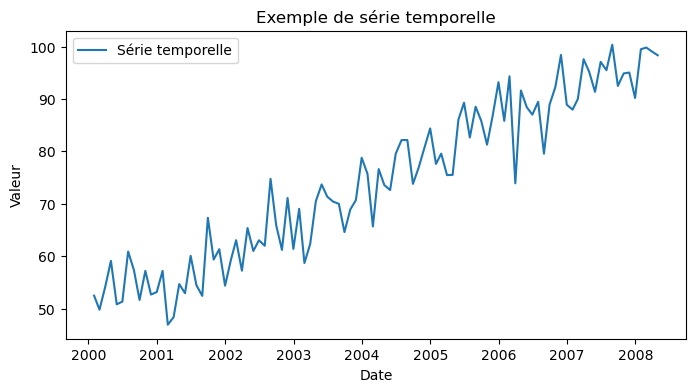

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Générer une série temporelle factice
np.random.seed(42)
dates = pd.date_range(start="2000-01-01", periods=100, freq="ME")
data = 50 + 0.5 * np.arange(100) + np.random.normal(0, 5, 100)

plt.figure(figsize=(8,4))
plt.plot(dates, data, label="Série temporelle")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.title("Exemple de série temporelle")
plt.legend()
plt.show()

### Composantes d'une Série Temporelle  
Une série temporelle peut être **décomposée en plusieurs composantes** :
1. **Tendance ($T_t$)** : évolution moyenne sur le long terme.
2. **Saisonnalité ($S_t$)** : fluctuations périodiques récurrentes.
3. **Résidu ($R_t$)** : variations aléatoires ou bruit.

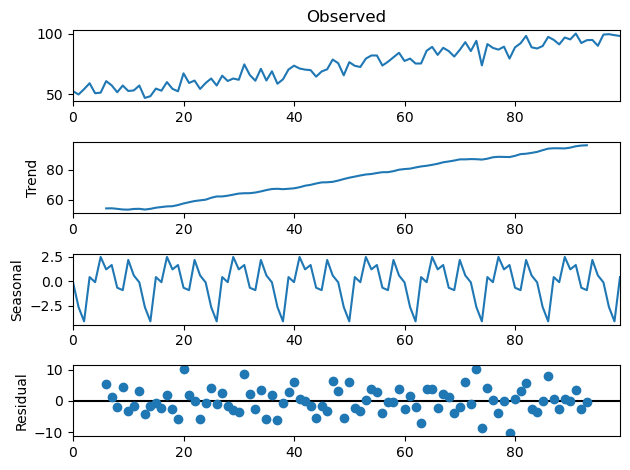

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposition de la série temporelle
result = seasonal_decompose(data, model='additive', period=12)
result.plot()
plt.show()

On distingue deux types de modèles pour la décomposition :
- **Modèle additif** : $X_t = T_t + S_t + R_t$ (les fluctuations sont indépendantes de l’échelle).
- **Modèle multiplicatif** : $X_t = T_t \times S_t \times R_t$ (les variations saisonnières sont proportionnelles à la tendance).

---

## 2️⃣ Stationnarité et Dépendance Temporelle

Un concept central en modélisation des séries temporelles est **la stationnarité**. Une série temporelle est dite **stationnaire** si ses propriétés statistiques (moyenne, variance et autocorrélation) **ne changent pas dans le temps**.

### Pourquoi la stationnarité est-elle cruciale ?
Les modèles classiques comme ARIMA ou VAR sont construits sur l'hypothèse que les données sont stationnaires. Une série non stationnaire contient souvent une **tendance ou une saisonnalité**, ce qui rend les prévisions instables.

### Test de stationnarité :
Le **test de Dickey-Fuller Augmenté (ADF)** est utilisé pour vérifier la stationnarité d’une série. Il teste l'hypothèse suivante :

- **$H_0$** : la série a une racine unitaire (elle **n’est pas stationnaire**).
- **$H_1$** : la série est stationnaire.

Si la **p-value** du test est inférieure à 0.05, on rejette $H_0$ et on conclut que la série est stationnaire.

In [24]:
from statsmodels.tsa.stattools import adfuller

# Test de Dickey-Fuller
result = adfuller(data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.15026113477286232
p-value: 0.944196469467031


Le **test de Dickey-Fuller Augmenté (ADF)** a renvoyé une **statistique de -0.15** avec une **p-value de 0.944**.

### 🔹 Interprétation :
- La **p-value est bien supérieure à 0.05**, ce qui signifie que nous **ne pouvons pas rejeter l’hypothèse nulle** ($H_0$).
- Cela indique que la série **n’est pas stationnaire** et qu’elle contient une **tendance** ou une **saisonnalité persistante**.

### Comment rendre une série stationnaire ?
Si une série n’est pas stationnaire, deux méthodes courantes permettent d’y remédier :
1. **Différenciation ($\Delta X_t = X_t - X_{t-1}$)** : suppression de la tendance.
2. **Décomposition et suppression de la saisonnalité**.

---

## 3️⃣ Les Modèles en Séries Temporelles

Nous explorerons **quatre modèles fondamentaux** pour la modélisation des séries temporelles :

- **ARIMA (AutoRegressive Integrated Moving Average)** : modélisation univariée pour séries stationnaires.
- **VAR (Vector AutoRegression)** : modélisation multivariée pour plusieurs séries interdépendantes.
- **VECM (Vector Error Correction Model)** : version améliorée de VAR pour séries cointegrées.
- **GARCH (Generalized Autoregressive Conditional Heteroskedasticity)** : modélisation de la volatilé conditionnelle.